`Task 4:`**Sales Prediction**

`Done by: Mohamad Moallem`

We will be using the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' and building a simple model that will predict sales according to the type of advertising(Tv,Radio,or Newpaper)

In [57]:
import pandas as pd#for cleaning and manipulating data#
import numpy as np#for mathmatical computation and array manipulation#
import matplotlib.pyplot as plt#for data visualization#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import r2_score

lets first import our data set and view it 

In [58]:
data_set=pd.read_csv('advertising.csv')
data_set.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


lets start by cleaning our data set by checking for missing values and duplicated values.

In [59]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [60]:
data_set.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

it seems that we have no missing values in our data set lets continue by checking duplicates

In [61]:
data_set.duplicated().sum()

0

looks like we have no duplicated or missing rows lets continue to the next step by tranforming our data

In [62]:
data_set.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


we do not need to standarize any column due to the absence of any extreme values from checking the max and min also the mean for every column

lets start directly by visualising and checking the correlation between our columns 

<Axes: >

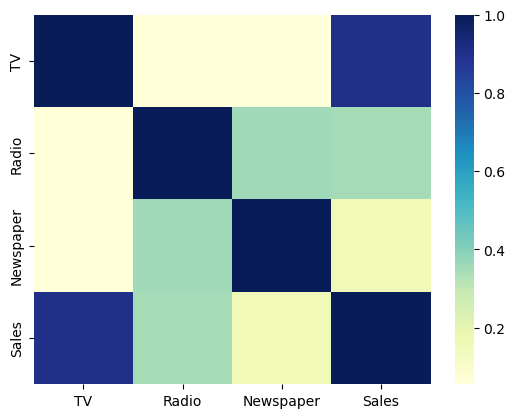

In [63]:
sns.heatmap(data_set.corr(),cmap='YlGnBu')

In [64]:
corr_matrix=data_set.corr()
display(corr_matrix['Sales'].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

we can see that sales has a high positve correlation with TV which is obvious since in modern times most people use TV rather than Radio or newpapers for news making TV commercials way more effective than advertising via Radio or newspaper and radio

lets start now by splitting our data into training data and testing data and start by training our model we have all the info we need and our data set is fully optimized for training the model 

In [65]:
X = data_set.drop('Sales', axis=1)
y = data_set['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,train_size=0.8, random_state=42)

In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


now lets start by training my model 

In [67]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [68]:
y_pred=model.predict(X_test)

In [69]:
print(y_pred)

[17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475  8.92396497  8.4817344
 18.2075123   8.06750728 12.64550975 14.93162809  8.12814594 17.89876565
 11.00880637 20.47832788 20.80631846 12.59883297 10.9051829  22.38854775
  9.41796094  7.92506736 20.83908497 13.81520938 10.77080925  7.92682509
 15.95947357 10.63490851 20.80292008 10.43434164 21.5784752  21.18364487
 12.12821771 22.80953262 12.60992766  6.46441252]


lets check the accuracy of our model

In [70]:
r2_score(y_test,y_pred)

0.9059011844150826

we can see that the accuracy of our model is 90.05% which means that has grasped the patterns between data points

In [71]:
LinearRegression_pred = pd.DataFrame({
    "Prediction": y_pred
})

LinearRegression_pred.to_csv("Sales_Prediction_LinearRegression.csv", index=False)